<a href="https://colab.research.google.com/github/indirasanis19/PKL/blob/main/PKL_INDIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TESSS

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os

# Load dan proses data dari folder
folder_path = "/content/drive/MyDrive/LISTRIK"
all_data = []

total_consumption_per_year = {}

items = os.listdir(folder_path)

for item in items:
    item_path = os.path.join(folder_path, item)
    if os.path.isdir(item_path):
        year = int(item)
        print(f"📂 Processing folder for year: {year}")

        files_in_year_folder = os.listdir(item_path)
        for file in files_in_year_folder:
            file_path = os.path.join(item_path, file)
            if file.endswith('.xls') or file.endswith('.xlsx'):
                try:
                    engine_type = "xlrd" if file.endswith('.xls') else "openpyxl"
                    df = pd.read_excel(file_path, sheet_name=None, engine=engine_type)
                    sheet_name = [s for s in df.keys() if "JUMLAH" in s.upper()]
                    if not sheet_name:
                        continue
                    df = df[sheet_name[0]]
                    df.columns = df.columns.str.strip()
                    if "JUMLAH" not in df.columns:
                        continue
                    jumlah_values = df["JUMLAH"].dropna()
                    if not pd.api.types.is_string_dtype(jumlah_values):
                        jumlah_values = jumlah_values.astype(str)
                    jumlah_values = jumlah_values.str.replace(",", "").astype(float)
                    total_consumption = jumlah_values.sum()

                    if year not in total_consumption_per_year:
                        total_consumption_per_year[year] = 0
                    total_consumption_per_year[year] += total_consumption

                    all_data.append({"Year": year, "Total Consumption": total_consumption})
                except Exception as e:
                    print(f"❌ Error reading {file_path}: {e}")

# Simpan hasil ke dalam file Excel
if all_data:
    final_df = pd.DataFrame(all_data)
    total_df = pd.DataFrame(list(total_consumption_per_year.items()), columns=["Year", "Total Consumption_Year"])
    final_df = final_df.merge(total_df, on="Year", how="left")
    final_df.to_excel(f"{folder_path}/final_data.xlsx", index=False)
    print("✅ Data saved to final_data.xlsx")
else:
    print("⚠️ No data collected.")

# Load data dari file hasil sebelumnya
file_path = f"{folder_path}/final_data.xlsx"
final_df = pd.read_excel(file_path)

# Pastikan format yang benar
df = final_df[['Year', 'Total Consumption_Year']]
df.set_index("Year", inplace=True)



📂 Processing folder for year: 2016
📂 Processing folder for year: 2017
📂 Processing folder for year: 2020
📂 Processing folder for year: 2021
📂 Processing folder for year: 2019
📂 Processing folder for year: 2018
📂 Processing folder for year: 2022
📂 Processing folder for year: 2023
📂 Processing folder for year: 2024
✅ Data saved to final_data.xlsx


In [5]:
# Normalisasi data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Fungsi untuk membuat data time series
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 3  # Gunakan data 3 tahun terakhir untuk prediksi
X, y = create_sequences(data_scaled, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Membuat model LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Training model
model.fit(X, y, epochs=100, batch_size=1, verbose=1)

# Prediksi tahun 2025
test_input = data_scaled[-seq_length:].reshape(1, seq_length, 1)
predicted_scaled = model.predict(test_input)
predicted = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))

print(f"Prediksi konsumsi listrik tahun 2025: {predicted[0][0]:.2f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1848
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0133
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0142
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0132
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0098
Epoch 10/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110
Epoch 11/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129
Epoch 12/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094
Epoch 13/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125
Epoch 14/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088
Epoch 15/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

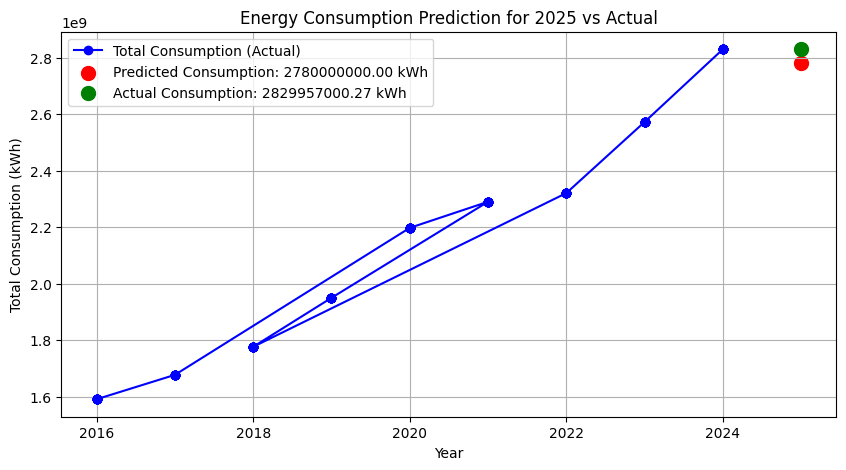

In [6]:
# Visualisasi data
years_future = list(df.index) + [2025]
predicted_values = list(df["Total Consumption_Year"]) + [predicted[0][0]]

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Total Consumption_Year"], marker='o', linestyle='-', color='blue', label='Total Consumption (Actual)')
plt.scatter(2025, predicted[0][0], color='red', label=f'Predicted Consumption: {predicted[0][0]:.2f} kWh', s=100)
plt.scatter(2025, df["Total Consumption_Year"].iloc[-1], color='green', label=f'Actual Consumption: {df["Total Consumption_Year"].iloc[-1]:.2f} kWh', s=100)

plt.xlabel('Year')
plt.ylabel('Total Consumption (kWh)')
plt.title(f'Energy Consumption Prediction for 2025 vs Actual')
plt.legend()
plt.grid(True)
plt.show()